<a href="https://colab.research.google.com/github/nasibehmohammadi/Thesis/blob/main/1LSTM_d1(validation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
656/656 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9158 - loss: 0.2932 - val_accuracy: 0.9468 - val_loss: 0.2079
Epoch 2/30
656/656 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9423 - loss: 0.2239 - val_accuracy: 0.9468 - val_loss: 0.2087
Epoch 3/30
656/656 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9407 - loss: 0.2284 - val_accuracy: 0.9468 - val_loss: 0.2083
Epoch 4/30
656/656 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9428 - loss: 0.2218 - val_accuracy: 0.9468 - val_loss: 0.2142
Epoch 5/30
656/656 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9384 - loss: 0.2325 - val_accuracy: 0.9468 - val_loss: 0.2100
Epoch 6/30
656/656 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9399 - loss: 0.2298 - val_accuracy: 0.9468 - val_loss: 0.2099
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9431 - loss: 0.2186
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
✅ دقت مدل روی داده‌های تست: 94.35%

📊 گزارش طبقه‌بندی:
              precision    recall  f1-score   support

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


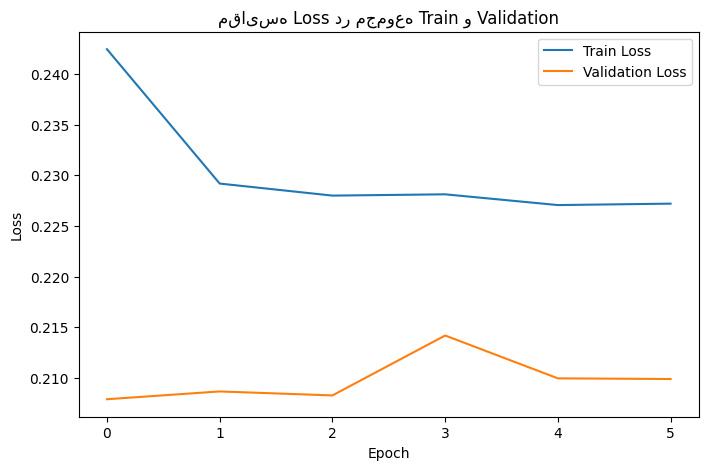

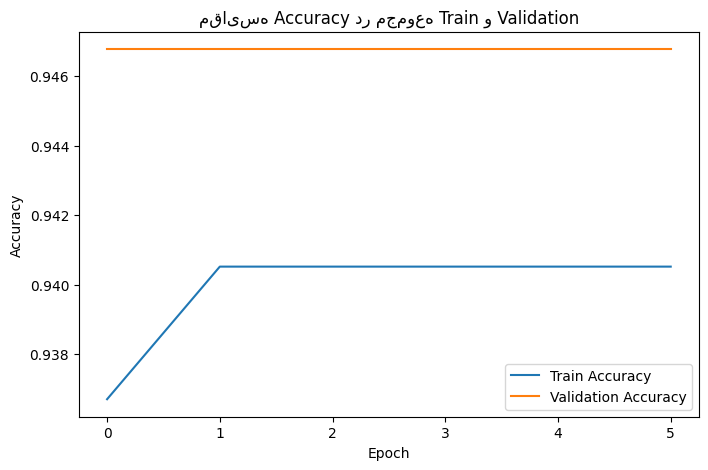

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report

# 1️⃣ بارگذاری دیتاست (لطفاً مسیر فایل را بررسی کنید)
file_path = "/content/d1.csv"  # تغییر مسیر فایل در صورت لزوم
df = pd.read_csv(file_path)

# 2️⃣ مشخص کردن ویژگی‌های ورودی و خروجی
feature_columns = ["B", "C", "D", "E", "F", "G", "H", "I", "J"]  # نام ویژگی‌ها
target_column = "A"  # نام ستون هدف

# تبدیل دیتافریم به آرایه NumPy
X_data = df[feature_columns].values
y_data = df[target_column].values

# تعداد ویژگی‌ها
num_features = X_data.shape[1]

# 3️⃣ تنظیم داده‌ها برای مدل LSTM
time_steps = 10  # تعداد مراحل زمانی

# ایجاد دنباله‌های زمانی برای LSTM
X_sequences = []
y_sequences = []

for i in range(len(X_data) - time_steps):
    X_sequences.append(X_data[i: i + time_steps])
    y_sequences.append(y_data[i + time_steps])

X_sequences = np.array(X_sequences)
y_sequences = np.array(y_sequences)

# 4️⃣ تقسیم داده‌ها به `Train/Validation/Test`
X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_sequences, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# 5️⃣ مقیاس‌بندی داده‌ها
scaler = MinMaxScaler()
X_train = X_train.reshape(-1, num_features)
X_val = X_val.reshape(-1, num_features)
X_test = X_test.reshape(-1, num_features)

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

X_train = X_train.reshape(-1, time_steps, num_features)
X_val = X_val.reshape(-1, time_steps, num_features)
X_test = X_test.reshape(-1, time_steps, num_features)

# 6️⃣ ایجاد مدل LSTM
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(time_steps, num_features)),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 7️⃣ کامپایل مدل
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# 8️⃣ استفاده از Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 9️⃣ آموزش مدل
history = model.fit(
    X_train, y_train,
    epochs=30, batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
    verbose=1
)

# 🔟 ارزیابی مدل روی مجموعه تست
loss, accuracy = model.evaluate(X_test, y_test)
y_pred = (model.predict(X_test) > 0.5).astype(int)
test_accuracy = accuracy_score(y_test, y_pred)

# نمایش دقت
print(f"✅ دقت مدل روی داده‌های تست: {test_accuracy * 100:.2f}%")
print("\n📊 گزارش طبقه‌بندی:")
print(classification_report(y_test, y_pred))

# ۱۱️⃣ رسم نمودار Loss برای بررسی بیش‌برازش
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('مقایسه Loss در مجموعه Train و Validation')
plt.legend()
plt.show()

# ۱۲️⃣ رسم نمودار Accuracy برای بررسی عملکرد مدل
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('مقایسه Accuracy در مجموعه Train و Validation')
plt.legend()
plt.show()



In [2]:
import timeit

execution_time = timeit.timeit('"-".join(str(n) for n in range(100))', number=10000)
print(f"Execution Time: {execution_time:.6f} seconds")


Execution Time: 0.131145 seconds
